# Introduction

This project investigates the conservation status of different species across National Parks within the United States.

We will aim to answer several questions with this data:
+ **Are certain types of species more likely to be protected?**
+ **Are specific national parks more biodiverse than others?**
+ **Which animal is the most common within the national parks?**

**Data Sources:**

Both `observations.csv` and `species_info.csv` we're provided. Both datasets emulate real data but are mostly fictional.

## Import Python Modules

We begin by loading the Python modules that will be used for our analysis:
+ `pandas` and `numpy` will be used to efficiently manipulate and analyze our data.
+ `seaborn` and `pyplot` will be used to create informative data visualizations.
+ `Table` will be used to conduct chi-sqaure analyses to assess statistical significance across categories.
+ `string` will be used to help us clean specific variables with punctuation characters in our data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.stats.contingency_tables import Table
import string

## Loading and Inspecting the Data

This project utilizes two primary datasets:
+ `species_info.csv`
+ `observations.csv`

We will immport both CSV files into our workspace. Once loaded, we will conduct an initial inspection to understand each dataset’s structure, including the number of variables, number of observations, and variable types.

In [2]:
sinfo = pd.read_csv('species_info.csv')
obser = pd.read_csv('observations.csv')

### species_info.csv

Our `species_info.csv` contains 4 variable columns about the conservation status of different species:
+ `category` - the class of each animal
+ `scientific_name` - the scientific name of each species
+ `common_name` - common names of each species
+ `conservation_status` - each species' current conservation status

In [3]:
sinfo.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### observations.csv

Our `observations.csv` contains 3 variable columns about the conservation status of different species:
+ `scientific_name` - the scientific name of each species
+ `park_name` - the park where the species were found
+ `observations` - the number of times each speices was observed at a park

In [4]:
obser.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [5]:
print(f'The number of rows in the species_info data: {sinfo.shape[0]}')
print(f'The number of rows in the observations data: {obser.shape[0]}\n')
print(f'Data types in the species_info data: \n{sinfo.dtypes}\n')
print(f'Data types in the observation data: \n{obser.dtypes}\n')

The number of rows in the species_info data: 5824
The number of rows in the observations data: 23296

Data types in the species_info data: 
category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

Data types in the observation data: 
scientific_name    object
park_name          object
observations        int64
dtype: object



After a quick examination of the data structure, several notable features stand out. The `observations` dataframe contains 23,296 rows across three variable columns, while the `species_info` dataframe contains 5,824 rows across four variable columns. In both dataframes, all variables are currently classified as `objects`, except for the `observations` column, which is classified as an `integer`.

## Exploring and Cleaning the Data

Now that we have a general understanding of the data structure, we can take a closer look at each dataset. In this step, we’ll examine the number of unique values within each variable and what those values represent, identify and remove any duplicate records to prepare for merging, and evaluate missing data within each dataframe. This process helps us better understand the diversity and distribution of our data while revealing any inconsistencies or redundancies. We’ll perform this exploration for each dataset separately before we merge.

### Counting Unique Values

We’ll start by examining the unique values and their counts within each dataset. To do this, we’ll create frequency tables for selected variables to gain an initial understanding of how our data are distributed.

In [6]:
print(f'The number of unique values in species_info: \n{sinfo.nunique()}\n')
print(f'The unique values of category: \n{sinfo.category.unique()}\n')
print(f'The frequency of each category: \n{sinfo.groupby('category').size()}\n')
print(f'The unique values of conservation_status: \n{sinfo.conservation_status.unique()}\n')
print(f'The number of species within each conservation_status category: \n{sinfo.groupby('conservation_status').size()}\n')

The number of unique values in species_info: 
category                  7
scientific_name        5541
common_names           5504
conservation_status       4
dtype: int64

The unique values of category: 
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']

The frequency of each category: 
category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

The unique values of conservation_status: 
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']

The number of species within each conservation_status category: 
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64



In [7]:
print(f'The number of unique values in observations: \n{obser.nunique()}\n')
print(f'The unique values of park_name: \n{obser.park_name.unique()}\n')
print(f'The number of rows for each park: \n{obser.groupby('park_name').size()}\n')
print(f'Total number of observations: {obser.observations.sum()}\n')

The number of unique values in observations: 
scientific_name    5541
park_name             4
observations        304
dtype: int64

The unique values of park_name: 
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']

The number of rows for each park: 
park_name
Bryce National Park                    5824
Great Smoky Mountains National Park    5824
Yellowstone National Park              5824
Yosemite National Park                 5824
dtype: int64

Total number of observations: 3314739



These examinations give us a clearer picture of what our data look like.

For `species_info`, we can see there are 7 categories, 5,541 scientific names, 5,504 common names, and 4 conservation statuses. When we look at the frequency of each category and conservation status, we notice that the total counts for `conservation_status` do not add up to the total number of observations, unlike `category`. This suggests that some values in conservation_status may be missing. We’ll keep this in mind when we handle missing data later.

For `observations`, there are 5,541 scientific names, 4 park names, and 304 unique values in the observations column. When we look at the frequency of `park_name`, the number of observations appears to be consistent across all four parks. This suggests that the dataset likely tracks observations for each species in every park. Altogether, the total number of recorded observations is 3,314,739 over a seven-day period.

### Identifying Duplicate Values

Now that we’ve examined the unique values and their counts for each dataset, we can assess whether there are duplicate entries within our data. In this section, we’ll focus specifically on the `species_info` dataset.

This dataset serves as a key for conservation status, meaning it links scientific names and common names to their corresponding status. Because of this role, it’s especially important that the dataset contains clean, non-duplicated entries before we merge it with the observations data.

However, we’ve identified a potential issue: some duplicate values appear in the `scientific_name` variable. Although the dataframe contains 5,824 rows, there are only 5,541 unique scientific names. This discrepancy suggests that some rows are duplicated and should be removed prior to merging.

**Note**: We’re not concerned about discrepancies in `common_name` counts, since that variable will not be used as a key for merging.

In [8]:
si_dup = sinfo[sinfo['scientific_name'].duplicated()]
print(f'Number of duplicated scientific names: {len(si_dup)}')
#There seem to be 283 duplicated values in scientific_name. Let's drop them from the sinfo dataset.

sinfo = sinfo.drop_duplicates(subset=['scientific_name'])
print(f'Updated length of species info after dropping duplicates: {len(sinfo)}\n')
print(f'Updated number of unique values in species_info: \n{sinfo.nunique()}')

Number of duplicated scientific names: 283
Updated length of species info after dropping duplicates: 5541

Updated number of unique values in species_info: 
category                  7
scientific_name        5541
common_names           5229
conservation_status       4
dtype: int64


Our intuition was correct: there were 283 duplicates in the `scientific_name` variable, which matches exactly the discrepancy we observed between the number of unique names and the total number of rows in the `species_info` dataset.

Notably, during our initial exploration, we identified another discrepancy between the number of unique values and the total dataset length, this time in the `observations` dataset.

In this dataset, we found that although there are 5,541 unique `scientific_name` values, each park contains 5,824 rows. This suggests that certain species may have additional entries within the 7-day observation period. However, based on the structure of the data, it appears more likely that these extra rows are errors. Most species seem to have a single observation value per park, so we would expect each park’s dataset to contain 5,541 rows rather than 5,824, mirroring the `species_info` structure.

With this in mind, let’s investigate duplicates in the `observations` dataset.

In [9]:
print(f'Counts of park_name and observations grouped by unique scientifc name: \n{round(obser.groupby('scientific_name').count().describe(),2)}\n')

Counts of park_name and observations grouped by unique scientifc name: 
       park_name  observations
count    5541.00       5541.00
mean        4.20          4.20
std         0.91          0.91
min         4.00          4.00
25%         4.00          4.00
50%         4.00          4.00
75%         4.00          4.00
max        12.00         12.00



Again, our intuition was correct. The minimum number of observations per `scientific_name` is 4, which aligns with the dataset’s structure. Every species should have one observation value for each of the four parks.

What is unexpected is that some species have up to two additional observation values per park, meaning there are cases where a species appears three times within the same park. This explains why the maximum count for `park_name` and `observations` is 12. We know this is incorrect based on how the data are structured, so these duplicate entries should be removed.

**Note**: Importantly, we are making a deliberate decision to remove values that may not necessarily be “incorrect” in a substantive sense, but that are incompatible with the expected structure of the dataset. For species with multiple observations in the same park, we cannot be certain whether the first or second value is the correct record of total observations. However, because the number of affected rows is small (approximately 283 per park), we will retain the first entry and remove any additional duplicates. It’s important to recognize that this approach carries the risk of removing a potentially accurate value, but it ensures a consistent and uniform dataset for merging later on. Other methods of dealing with these additional observations could be used (e.g., adding the observations together), but we will opt to simply remove as to not potentially inflate the observation values for certain species.

We are going to find duplicates of specific `park_name`/`observations` combinations and remove the redundant datapoints after.

In [10]:
obs_dup = obser[obser[['scientific_name', 'park_name']].duplicated()]
print(f'Number of duplicated scientific name/park name combinations: {len(obs_dup)}\n')
#There are 1,132 duplicated combinations in our data. 
#If we divide this value by 4 because of the number of parks, we have our expected value of 283 duplicates per park. Let's drop these rows.

obser = obser.drop_duplicates(subset=['scientific_name', 'park_name'])
print(f'Updated number of rows in observations after dropping duplicates: {len(obser)}\n')
print(f'Updated counts of park_name and observations grouped by unique scientifc name: \n{obser.groupby('scientific_name').count().describe()}\n')
print(f'Updated number of unique values in observations: \n{obser.nunique()}\n')
print(f'Updated number of rows for each park: \n{obser.groupby('park_name').size()}\n')
print(f'Updated total number of observations: {obser.observations.sum()}\n')

Number of duplicated scientific name/park name combinations: 1132

Updated number of rows in observations after dropping duplicates: 22164

Updated counts of park_name and observations grouped by unique scientifc name: 
       park_name  observations
count     5541.0        5541.0
mean         4.0           4.0
std          0.0           0.0
min          4.0           4.0
25%          4.0           4.0
50%          4.0           4.0
75%          4.0           4.0
max          4.0           4.0

Updated number of unique values in observations: 
scientific_name    5541
park_name             4
observations        303
dtype: int64

Updated number of rows for each park: 
park_name
Bryce National Park                    5541
Great Smoky Mountains National Park    5541
Yellowstone National Park              5541
Yosemite National Park                 5541
dtype: int64

Updated total number of observations: 3154266



### Replacing Missing Values

Before merging our datasets and beginning the analysis, the last issue we need to address is the presence of missing values. From our initial exploration, we already know that some columns contain missing data (e.g., `conservation_status`). However, to ensure a complete and reliable dataset, we should thoroughly assess all columns in both datasets for missing values.

In [11]:
print(f'The number of NA values across species_info columns: \n{sinfo.isna().sum()}\n')
print(f'The number of NA values across observations columns: \n{obser.isna().sum()}\n')

The number of NA values across species_info columns: 
category                  0
scientific_name           0
common_names              0
conservation_status    5363
dtype: int64

The number of NA values across observations columns: 
scientific_name    0
park_name          0
observations       0
dtype: int64



We’ve confirmed that `conservation_status` is the only variable with missing values. This makes sense given that not every species requires a designated conservation status.

As a final step before beginning our analysis, we will replace these missing values with a placeholder value (`'Least Concern'`).

In [12]:
sinfo.conservation_status = sinfo.conservation_status.fillna('Least Concern')
print(f'Updated number of species within each conservation_status category: \n{sinfo.groupby('conservation_status').size()}\n')

Updated number of species within each conservation_status category: 
conservation_status
Endangered              15
In Recovery              3
Least Concern         5363
Species of Concern     151
Threatened               9
dtype: int64



## Analysis

Our data are now properly cleaned, and we can move on to merging and analyzing our datasets. After merging, we will proceed to address each of the research questions we outlined at the beginning of this project.

### Merging Data

We want to ensure that all of our data are consolidated before we begin analyzing and visualizing the results. As mentioned earlier, we will merge `species_info` with `observations` using the `scientific_name` variable, which serves as the key linking the two datasets. After completing the merge, we will take another careful look at the combined dataset to confirm that the total number of observations and counts align with our expectations. We are also going to reorder our columns slightly.

In [13]:
biod = pd.merge(sinfo, obser, on='scientific_name')
biod.head()

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",Least Concern,Yosemite National Park,128


In [14]:
print(f'The number of rows in the biodiversity data: {biod.shape[0]}\n')
print(f'Data types in the biodiversity data: \n{biod.dtypes}\n')
print(f'The number of unique values in biodiversity: \n{biod.nunique()}\n')
print(f'The frequency of each category: \n{biod.groupby('category').size()}\n')

new_order = ['category', 'scientific_name', 'common_names', 'park_name', 'observations', 'conservation_status']
biod = biod[new_order]
biod.head()

The number of rows in the biodiversity data: 22164

Data types in the biodiversity data: 
category               object
scientific_name        object
common_names           object
conservation_status    object
park_name              object
observations            int64
dtype: object

The number of unique values in biodiversity: 
category                  7
scientific_name        5541
common_names           5229
conservation_status       5
park_name                 4
observations            303
dtype: int64

The frequency of each category: 
category
Amphibian              316
Bird                  1952
Fish                   500
Mammal                 704
Nonvascular Plant     1332
Reptile                312
Vascular Plant       17048
dtype: int64



,category,scientific_name,common_names,park_name,observations,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Bryce National Park,130,Least Concern
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Yellowstone National Park,270,Least Concern
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Great Smoky Mountains National Park,98,Least Concern
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Yosemite National Park,117,Least Concern
4,Mammal,Bos bison,"American Bison, Bison",Yosemite National Park,128,Least Concern


### Are certain types of species more likely to be protected?

First, we will determine whether specific types of organisms are more or less likely to be protected based on their conservation status. To do this, we will examine the frequency of protected and non-protected species within each organism category and assess whether certain categories differ significantly from one another.

We’ll begin by visualizing the counts of `conservation_status` across organism categories. For clarity, we will exclude the `Least Concern` category from this visualization.

In [15]:
cons_table = biod[biod.conservation_status != 'Least Concern'].groupby(['category', 'conservation_status'])['scientific_name'].count().unstack()
cons_table = cons_table.fillna(0)
cons_table = (cons_table / 4).astype(int) #divide by the number of parks we are analyzing
order = ['Endangered', 'Threatened', 'Species of Concern', 'In Recovery']
cons_table = cons_table[order]
cons_table

conservation_status,Endangered,Threatened,Species of Concern,In Recovery
category,,,,
Amphibian,1,2,4,0
Bird,4,0,68,3
Fish,3,3,4,0
Mammal,6,2,22,0
Nonvascular Plant,0,0,5,0
Reptile,0,0,5,0
Vascular Plant,1,2,43,0


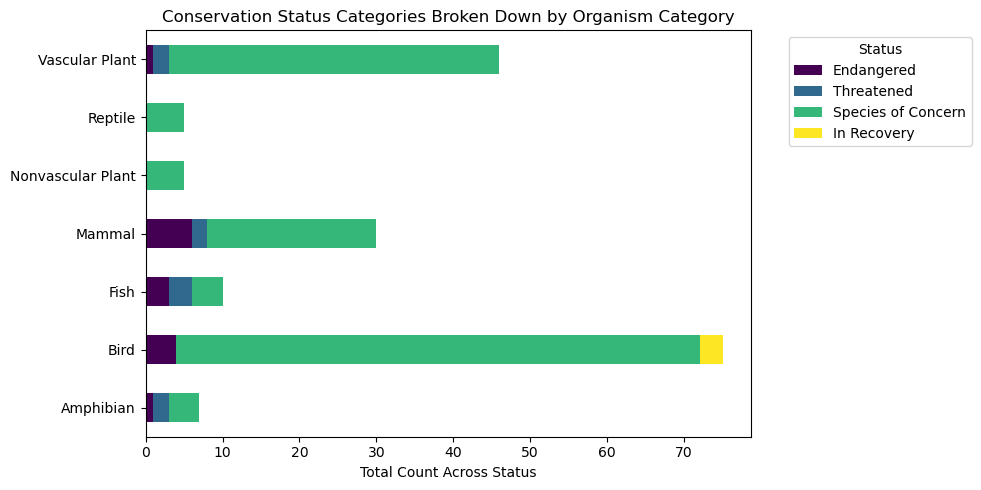

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
cons_table.plot(kind='barh', stacked=True, ax=ax, colormap='viridis')
ax.set_xlabel('Total Count Across Status')
ax.set_title('Conservation Status Categories Broken Down by Organism Category')
ax.legend(title='Status', bbox_to_anchor=(1.05,1), loc='upper left')
ax.set_ylabel('')
plt.tight_layout();

Now, we'll create a new variable called `protected`. This value will convert our `conservation_status` variable into a binary variable and will represent those species that are being monitored in each national park.

`Protected` is comprised of every `conversation_status` except for `Least Concern`.

In [17]:
biod['protected'] = biod.conservation_status != 'Least Concern'

cat_pro = biod.groupby(['category', 'protected']).scientific_name.nunique().reset_index().pivot(columns='protected',
                                                                                                index='category',
                                                                                                values='scientific_name').reset_index()

cat_pro.columns = ['category', 'not_protected', 'protected']
order = ['category', 'protected', 'not_protected']
cat_pro = cat_pro[order]
cat_pro['percent_protected'] = round(cat_pro.protected / (cat_pro.not_protected + cat_pro.protected) *100,2)
cat_pro

,category,protected,not_protected,percent_protected
0,Amphibian,7,72,8.86
1,Bird,75,413,15.37
2,Fish,10,115,8.00
3,Mammal,30,146,17.05
4,Nonvascular Plant,5,328,1.50
5,Reptile,5,73,6.41
6,Vascular Plant,46,4216,1.08


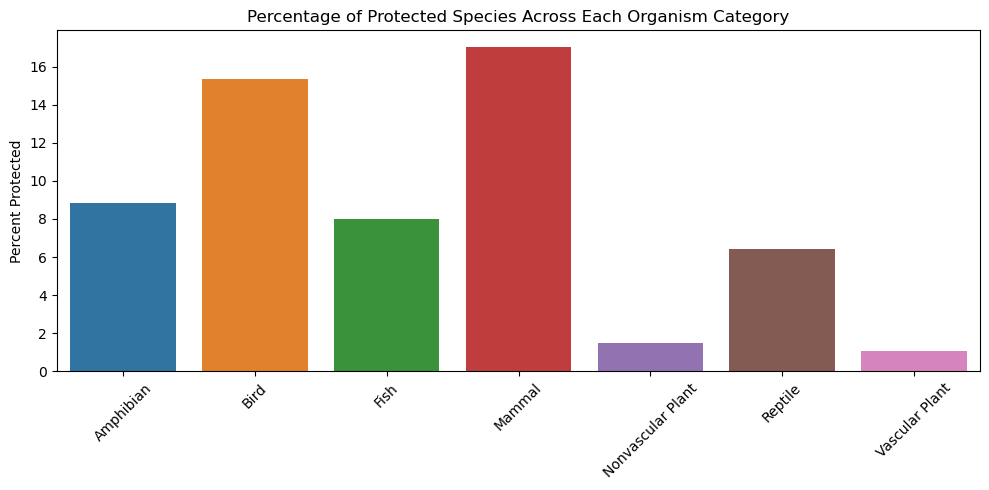

In [18]:
fig, axes = plt.subplots(figsize=(10,5))
ax = sns.barplot(x='category', y='percent_protected', data=cat_pro, hue='category')
ax.tick_params(axis='x', labelrotation=45)
ax.set_xlabel('')
ax.set_ylabel('Percent Protected')
ax.set_title('Percentage of Protected Species Across Each Organism Category')
plt.tight_layout();

It is clear from our pivot table and bar plot that mammals and birds tend to be the most protected organisms, followed by amphibians, fish, and reptiles, and lastly vascular and nonvascular plants.

While this pattern is informative, we should determine whether `conservation_status` designation is statistically significant for each category. To do this, we will conduct a chi-square test to assess whether the observed differences in protection status across organism categories are statistically different from chance.

In [19]:
category_lab = ['Amphibian', 'Bird', 'Fish', 'Mammal', 'Nonvascular Plant', 'Reptile', 'Vascular Plant']
status_lab = ['Protected', 'Not Protected']

table = Table(cat_pro[['protected', 'not_protected']].values)
chi2 = table.test_nominal_association()
adj_resid = table.standardized_resids
resid_df = pd.DataFrame(adj_resid, index=category_lab, columns = status_lab)
sig_cells = resid_df[np.abs(resid_df) > 2].dropna(how='all', axis=0)

print(f'{chi2}\n')
print(f'{round(resid_df,2)}\n')
print(f'{round(sig_cells,2)}\n')

df          6
pvalue      0.0
statistic   425.653201008395

                   Protected  Not Protected
Amphibian               2.87          -2.87
Bird                   15.95         -15.95
Fish                    3.07          -3.07
Mammal                 10.58         -10.58
Nonvascular Plant      -1.83           1.83
Reptile                 1.61          -1.61
Vascular Plant        -16.44          16.44

                Protected  Not Protected
Amphibian            2.87          -2.87
Bird                15.95         -15.95
Fish                 3.07          -3.07
Mammal              10.58         -10.58
Vascular Plant     -16.44          16.44



The results of our chi-square analysis suggest that there are significant differences across our categories in terms of which are more or less likely to be protected: <br>
($\chi^2$(6) = 425.65, *p* < .001). 

To determine which categories are driving this result, we examined the adjusted standardized residuals across our categories. These values function as a Z-score, and values **greater than $|2|$** indicate which organisms are driving the chi-square result. These residual values can be seen across all categories in our first table, and our second table highlights only the categories that exceed this threshold.

Specifically, we can state that categories with positive Z-scores for `Protected` (Amphibians, Birds, Fish, and Mammals) are **more likely** to be protected, while `Vascular Plants` (with a negative Z-score) are **less likely** to be protected than expected by chance.

### Are specific national parks more biodiverse than others?

Next, we're going to assess the distributions of each organism category and assess the distribution of their observations. This information will give us a cursory look into the biodiversity of each organism categroy across a 7-day period.

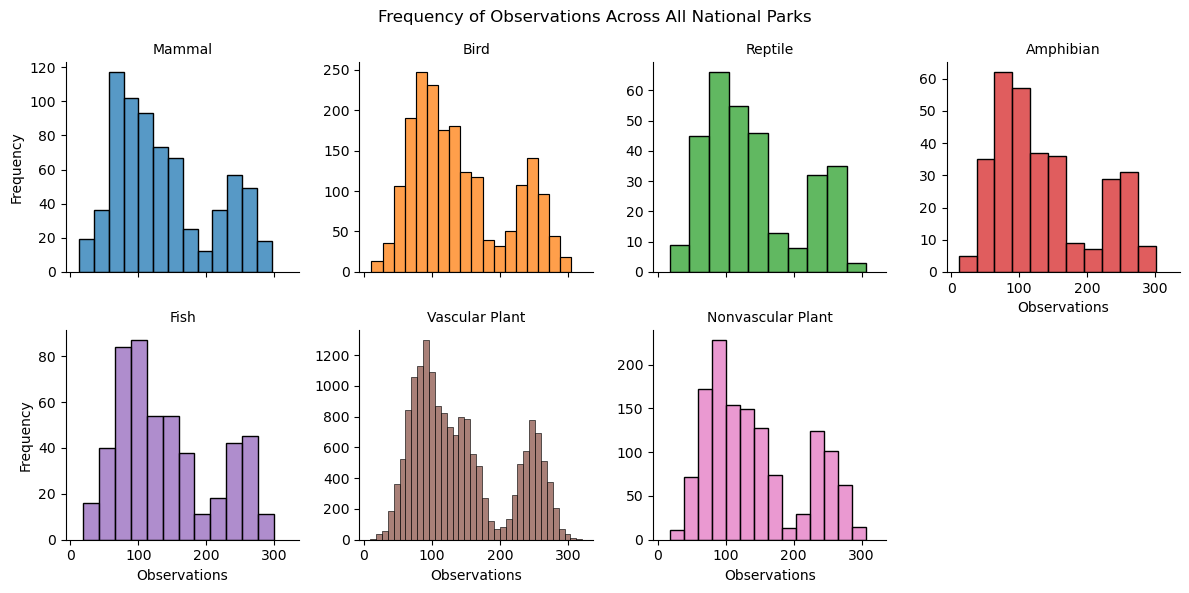

In [20]:
multi_obs = sns.FacetGrid(biod, col='category', col_wrap=4, hue='category', sharey=False)
multi_obs = (multi_obs.map(sns.histplot, 'observations').set_axis_labels('Observations', 'Frequency').set_titles('{col_name}'))
multi_obs.fig.suptitle('Frequency of Observations Across All National Parks')
plt.tight_layout();

Our histograms show the distribution of observation counts for each type of organism across our parks. Each category appears to display a *slightly* bimodal pattern (i.e., a large primary distribution with a smaller secondary distribution shifted to the right).

These shapes may be a result of combining data across all four parks. This visualization suggests that one or more parks simply have higher overall organism densities, which could produce the secondary peak. To investigate this, we will break the analysis down by individual park to determine whether biodiversity differs across parks.

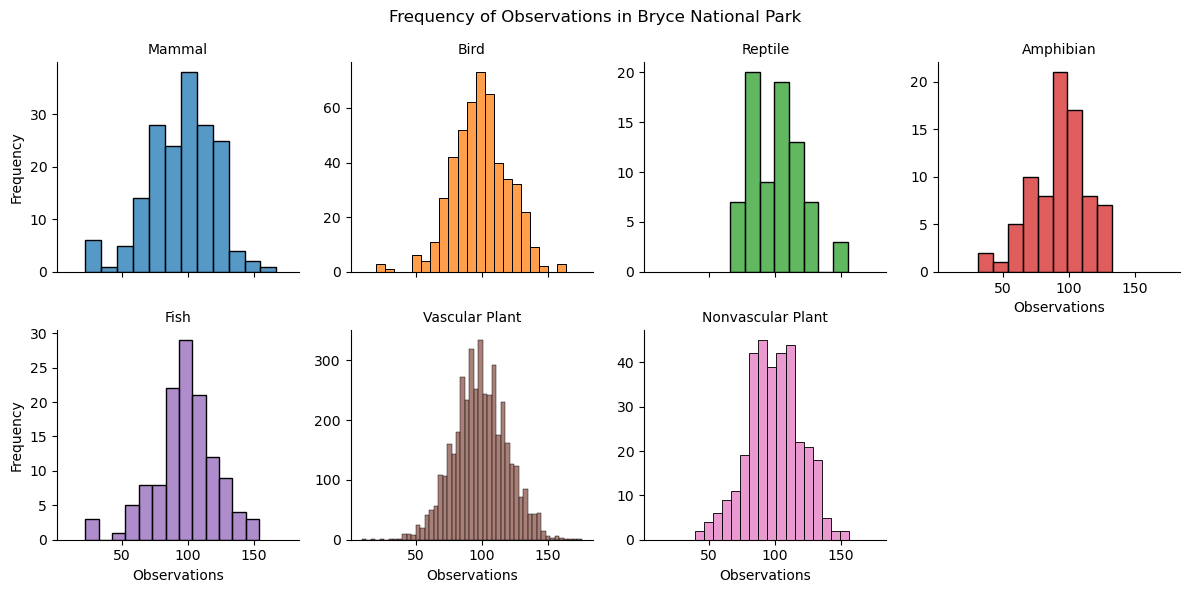

In [21]:
#We subset our data based on park before visualizing.
bry_biod = biod[biod['park_name'] == 'Bryce National Park']
gsm_biod = biod[biod['park_name'] == 'Great Smoky Mountains National Park']
yel_biod = biod[biod['park_name'] == 'Yellowstone National Park']
yos_biod = biod[biod['park_name'] == 'Yosemite National Park']

#Bryce National Park
bry_multi_obs = sns.FacetGrid(bry_biod, col='category', col_wrap=4, hue='category', sharey=False)
bry_multi_obs = (bry_multi_obs.map(sns.histplot, 'observations').set_axis_labels('Observations', 'Frequency').set_titles('{col_name}'))
bry_multi_obs.fig.suptitle('Frequency of Observations in Bryce National Park')
plt.tight_layout();

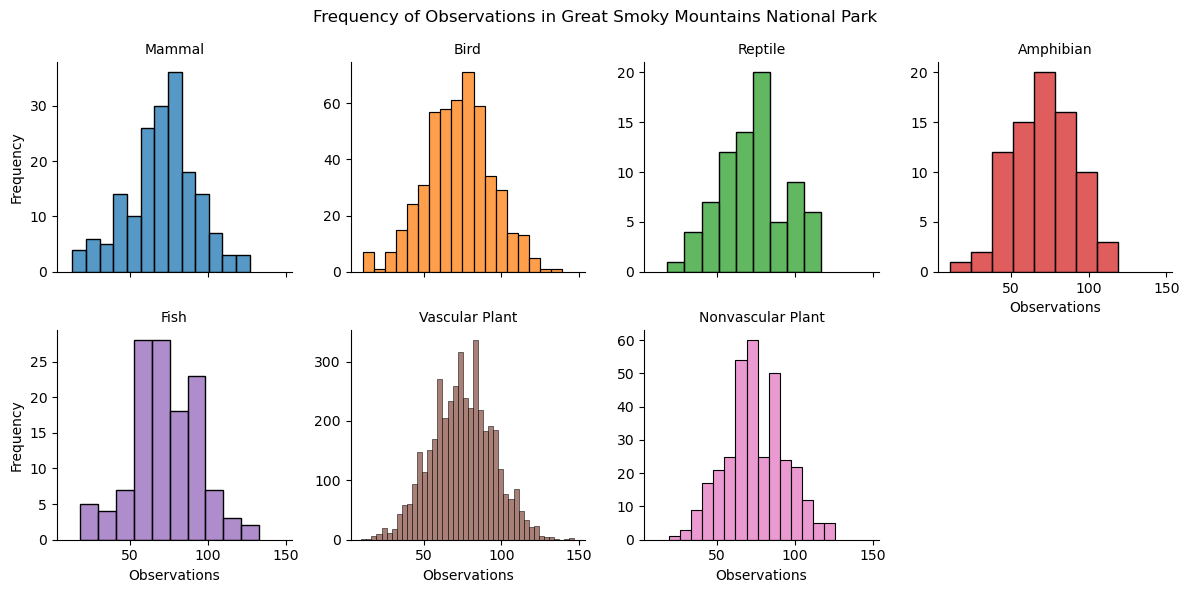

In [22]:
#Great Smoky Mountains National Park
gsm_multi_obs = sns.FacetGrid(gsm_biod, col='category', col_wrap=4, hue='category', sharey=False)
gsm_multi_obs = (gsm_multi_obs.map(sns.histplot, 'observations').set_axis_labels('Observations', 'Frequency').set_titles('{col_name}'))
gsm_multi_obs.fig.suptitle('Frequency of Observations in Great Smoky Mountains National Park')
plt.tight_layout();

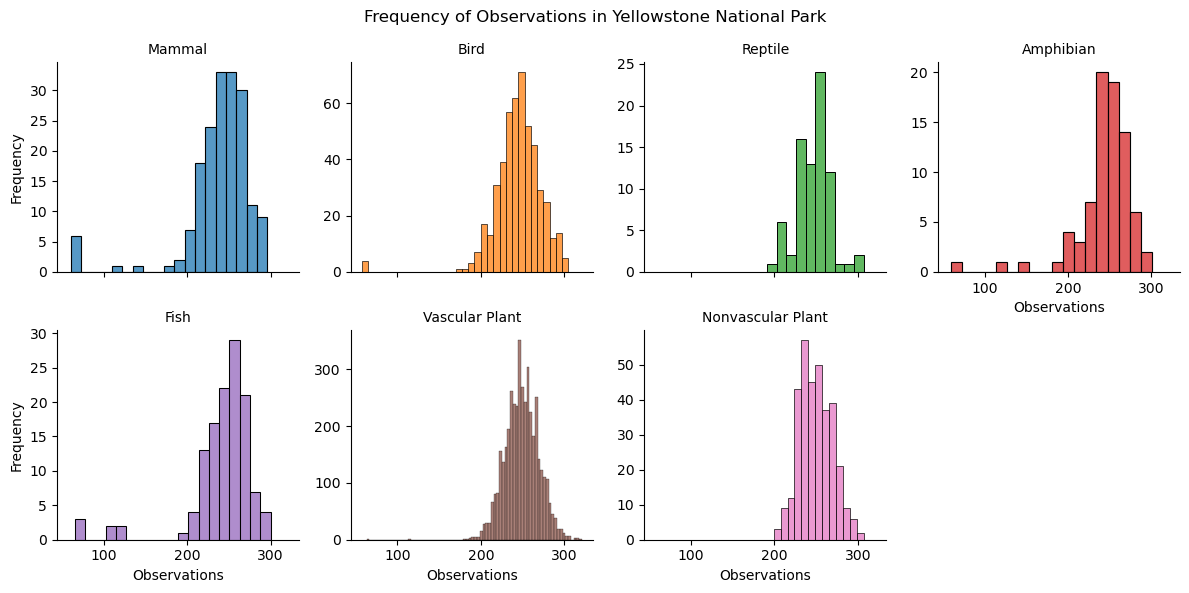

In [23]:
#Yellowstone National Park
yel_multi_obs = sns.FacetGrid(yel_biod, col='category', col_wrap=4, hue='category', sharey=False)
yel_multi_obs = (yel_multi_obs.map(sns.histplot, 'observations').set_axis_labels('Observations', 'Frequency').set_titles('{col_name}'))
yel_multi_obs.fig.suptitle('Frequency of Observations in Yellowstone National Park')
plt.tight_layout();

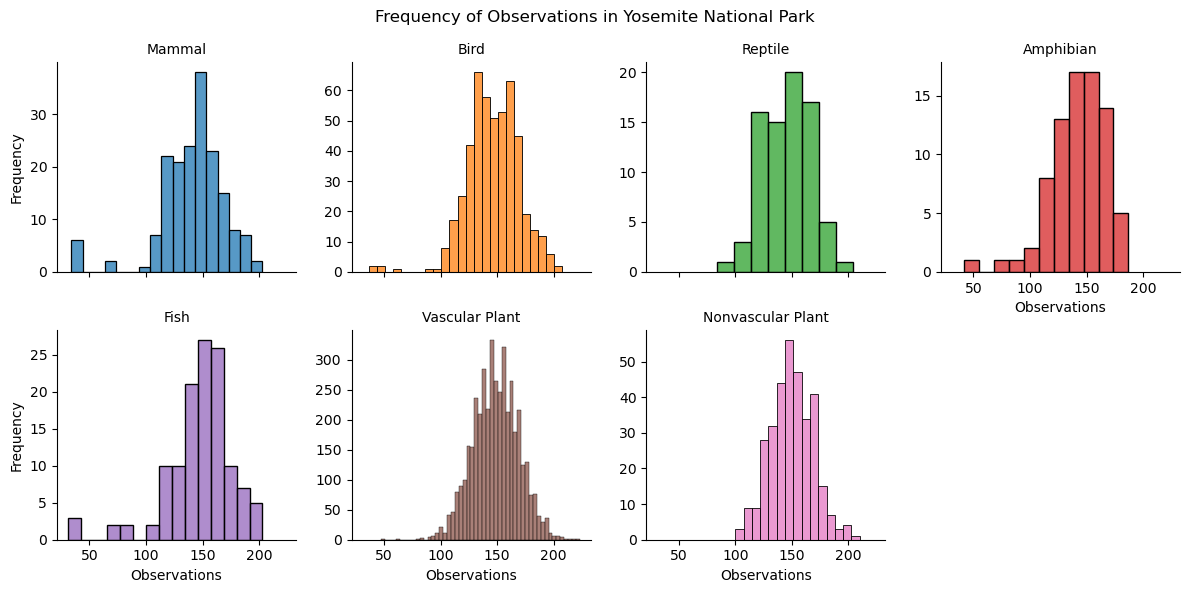

In [24]:
#Yosemite National Park
yos_multi_obs = sns.FacetGrid(yos_biod, col='category', col_wrap=4, hue='category', sharey=False)
yos_multi_obs = (yos_multi_obs.map(sns.histplot, 'observations').set_axis_labels('Observations', 'Frequency').set_titles('{col_name}'))
yos_multi_obs.fig.suptitle('Frequency of Observations in Yosemite National Park')
plt.tight_layout();

By breaking down our histograms by national park, we can see that our intuition was correct. When we look at the number of observations per park, it becomes clear that Bryce National Park and Great Smoky Mountains National Park have the lowest observation counts (\~50–100) across organism categories, followed by Yosemite National Park (\~100–200), and finally Yellowstone National Park with the highest observation counts (\~200–300). Thus, the bimodality we observed earlier appears to be driven by the fact that Yellowstone has a much higher organism density than the other three parks.

Importantly, the *relative* counts of each organism type remain consistent across parks. This suggests that biodiversity patterns are similar among the parks, while overall organism density is the primary differentiator.

### What animal is most common within the national parks?

Finally, we are going to determine the most common animal across our parks. To do this, we will use the `common_names` variable, which provides readable species names that are more suitable for non-technical audiences. Although `scientific_name` was used for merging our datasets, it is not ideal for communicating these results, so we will perform additional cleaning to ensure that `common_names` is ready for this stage of the analysis.

In [25]:
def delete_punc(text):
    for char in string.punctuation:
        text = text.replace(char, '')
    return text

plants = ['Vascular Plant', 'Nonvascular Plant']
com_names = biod[~biod.category.isin(plants)].common_names.apply(delete_punc).str.split().tolist()
com_names[:10]

[['Gappers', 'RedBacked', 'Vole'],
 ['Gappers', 'RedBacked', 'Vole'],
 ['Gappers', 'RedBacked', 'Vole'],
 ['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['American', 'Bison', 'Bison'],
 ['American', 'Bison', 'Bison'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle']]

We've extracted all unique words in each row from the `common_names` variable and removed their punctuation. Now, we need to remove duplicate values in these rows so we aren't overcounting. We will do this by converting the values in our list to keys in a dictionary, which will remove duplicates, then convert these dictionaries back into a list.

In [26]:
uniq_names = []

for word in com_names:
    word = list(dict.fromkeys(word))
    uniq_names.append(word)

uniq_names[:10]

[['Gappers', 'RedBacked', 'Vole'],
 ['Gappers', 'RedBacked', 'Vole'],
 ['Gappers', 'RedBacked', 'Vole'],
 ['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['American', 'Bison'],
 ['American', 'Bison'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated']]

Now, let’s collapse these lists of words into a single list so we can iterate over it.

In [27]:
clean_names = [word for row in uniq_names for word in row]
clean_names[:10]

['Gappers',
 'RedBacked',
 'Vole',
 'Gappers',
 'RedBacked',
 'Vole',
 'Gappers',
 'RedBacked',
 'Vole',
 'Gappers']

Finally, we count each word to determine the most common animal that appears across our parks.

In [28]:
name_count = []

for word in clean_names:
    count = clean_names.count(word)
    name_count.append((word, int(count/4))) #we divide by 4 because we're aggregating across all parks

name_count_df_d = pd.DataFrame(set(name_count), columns = ['Word', 'Count']).sort_values('Count', ascending=False).head(10).to_string(index=False)

print(f'Most Common Animal Across All National Parks: \n{name_count_df_d}')

Most Common Animal Across All National Parks: 
      Word  Count
   Warbler     59
  Northern     46
Salamander     41
   Eastern     38
   Western     29
     Snake     28
   Sparrow     28
  American     27
    Common     25
    Shiner     20


The most common animal across our national parks is the `Warbler` with 59 distinct types.

With this information, we can now investigate the distribution of `Warbler` observations by park and how many of these birds are protected or not within each park. To do this, we will use regular expressions to create a new column that identifies whether each species is a Warbler.

In [29]:
biod['warbler'] = biod.common_names.str.contains(r'\bWarbler\b', regex=True)
biod_w = biod[biod['warbler']==True]
biod_w = biod_w.sort_values(by=['scientific_name', 'park_name'], ascending=True)
biod_w.head(10)

,category,scientific_name,common_names,park_name,observations,conservation_status,protected,warbler
12660,Bird,Cardellina pusilla,Wilson's Warbler,Bryce National Park,74,Least Concern,False,True
12661,Bird,Cardellina pusilla,Wilson's Warbler,Great Smoky Mountains National Park,62,Least Concern,False,True
12663,Bird,Cardellina pusilla,Wilson's Warbler,Yellowstone National Park,240,Least Concern,False,True
12662,Bird,Cardellina pusilla,Wilson's Warbler,Yosemite National Park,162,Least Concern,False,True
988,Bird,Dendroica caerulescens,Black-Throated Blue Warbler,Bryce National Park,94,Least Concern,False,True
990,Bird,Dendroica caerulescens,Black-Throated Blue Warbler,Great Smoky Mountains National Park,84,Least Concern,False,True
989,Bird,Dendroica caerulescens,Black-Throated Blue Warbler,Yellowstone National Park,261,Least Concern,False,True
991,Bird,Dendroica caerulescens,Black-Throated Blue Warbler,Yosemite National Park,183,Least Concern,False,True
993,Bird,Dendroica castanea,Bay-Breasted Warbler,Bryce National Park,98,Least Concern,False,True
992,Bird,Dendroica castanea,Bay-Breasted Warbler,Great Smoky Mountains National Park,94,Least Concern,False,True


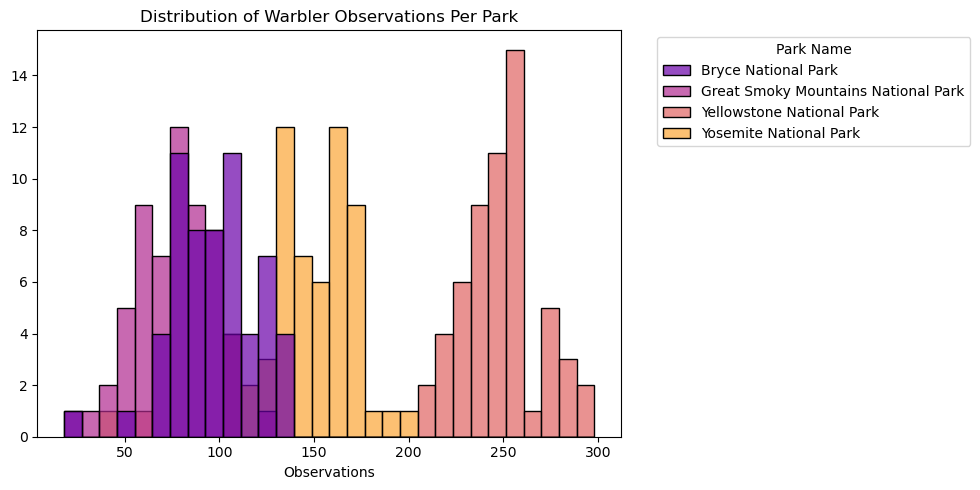

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=biod_w, x='observations', hue = 'park_name', alpha = .7, ax=ax, palette = 'plasma', bins=30)
ax.get_legend().set_bbox_to_anchor((1.05,1))
ax.get_legend().set_title('Park Name')
ax.set_title('Distribution of Warbler Observations Per Park')
ax.set_xlabel('Observations')
ax.set_ylabel('')
plt.tight_layout();

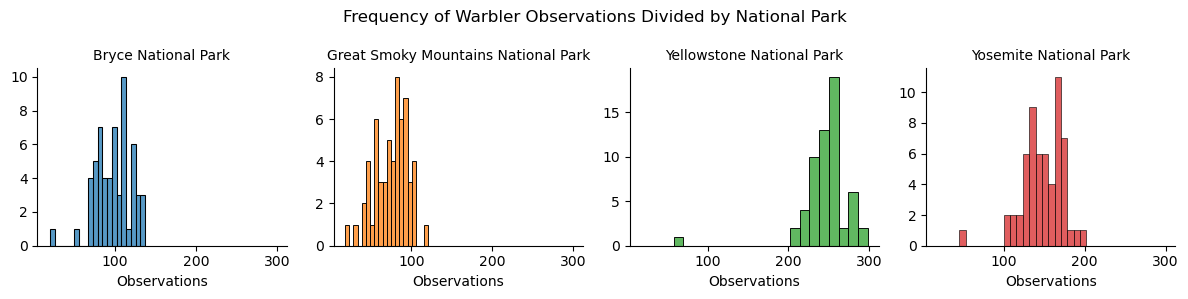

In [31]:
warb_multi_obs = sns.FacetGrid(biod_w, col='park_name', col_wrap=4, hue='park_name', sharey=False)
warb_multi_obs = (warb_multi_obs.map(sns.histplot, 'observations', bins=20).set_axis_labels('Observations', '').set_titles('{col_name}'))
warb_multi_obs.fig.suptitle('Frequency of Warbler Observations Divided by National Park')
plt.tight_layout();

Similar to our histogram of observations for all species, the `Warbler` distribution is bimodal, with multiple peaks reflecting the density of observations within each national park. For our final analysis, we will examine the `protected` status of `Warbler` species observations across the national parks.

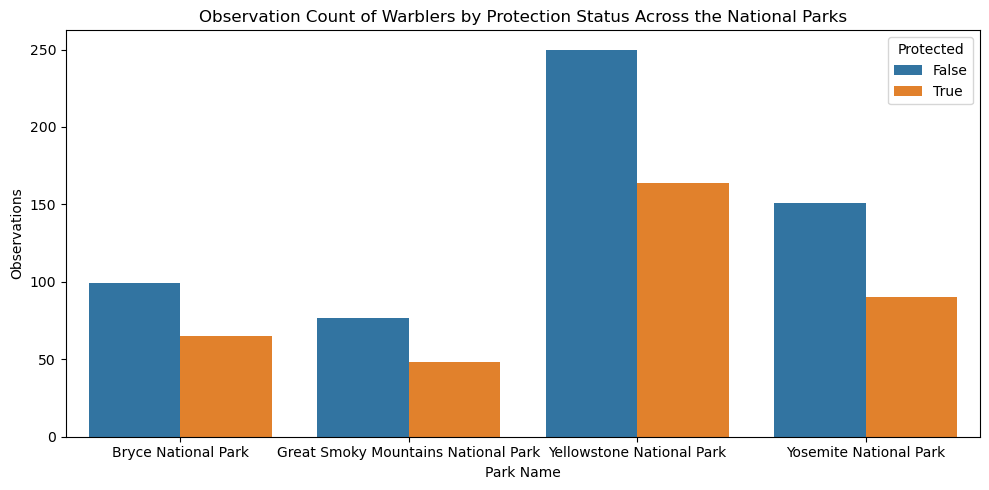

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=biod_w, x= 'park_name', y= 'observations', hue='protected', errorbar=None)
ax.get_legend().set_title('Protected')

ax.set_title('Observation Count of Warblers by Protection Status Across the National Parks')
ax.set_xlabel('Park Name')
ax.set_ylabel('Observations')
plt.tight_layout();

# Conclusion

This project investigated several aspects of biodiversity across four national parks in the United States.

We answered the following questions:
+ **Are certain types of species more likely to be protected?**
    + Yes. We found that Amphibians, Birds, Fish, and Mammals were significantly more likely to be protected species, while Vascular Plants were significantly less likely to be protected.
+ **Are specific national parks more biodiverse than others?**
    + No. Biodiversity levels were relatively consistent across the parks. However, some parks exhibited higher species density. For example, `Yellowstone` tended to have more observations across all species compared to parks such as `Bryce` and `Great Smoky Mountains`.
+ **Which animal is the most common within the national parks?**
    + The `Warbler` was the most commonly observed animal across all four parks. Its distribution aligned with aggregate patterns observed within each park. Additionally, observation counts suggest that most `Warbler` observations correspond to species that are not protected.